#### 데이터 로드 후 확인  

In [ ]:
import pandas as pd

df = pd.read_csv('C:/Users/wjdqh/injige/abalone.csv')
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### 결측치 확인

In [5]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

#### 인코딩
위의 df 확인결과 성별을 제외하고는 모두 float형임을 알수 있다 따라서 성별에 대해서만 인코딩한다

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


['Sex'] Column에서 2 &rarr;  Male // 0 &rarr; Female  // 1 &rarr; Infant 임이 잘 들어간 것이 확인  

#### 학습데이터 분할 및 타겟 설정  

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("Rings", axis=1)  
y = df["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####  모델별 학습 및 혼동행렬/RMSE를 통한 평가  
평균 제곱근오차(RMSE)가 향후 업데이트를 한다고 해서 mean_squared_error() &rarr; root_mean_squared_error() 변경

- 선형 회귀 (Linear Regression)

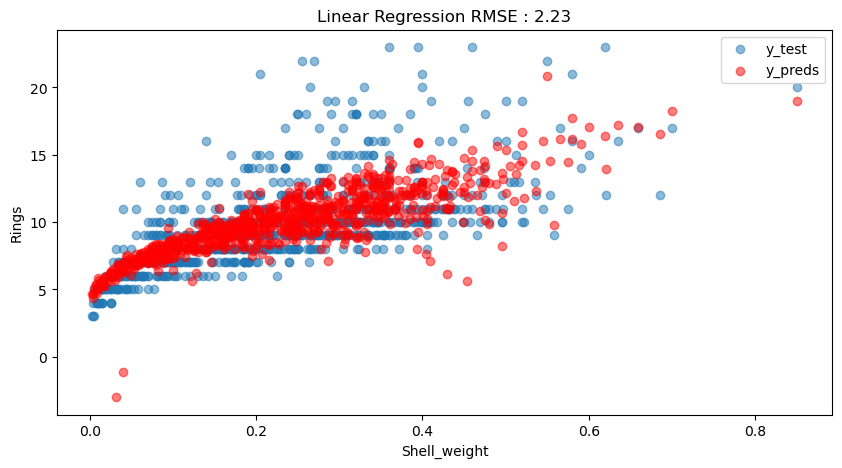

In [44]:
from sklearn.linear_model import LinearRegression  # 선형 회귀
from sklearn.metrics import root_mean_squared_error  # RMSE 
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_preds).round(2)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.5)
plt.scatter(X_test['Shell_weight'], y_preds, label='y_preds', alpha=0.5, color='red')
plt.title(f"Linear Regression RMSE : {rmse}")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()


- 결정 트리 회귀 (Decision Tree Regression)

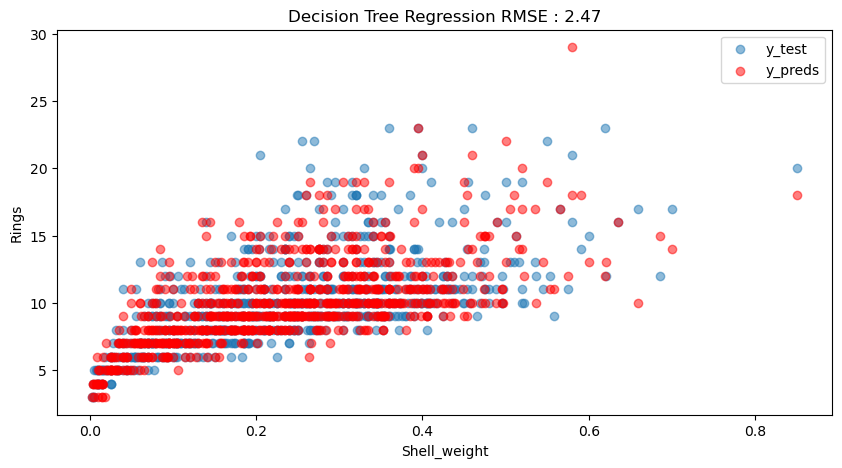

In [48]:
from sklearn.tree import DecisionTreeRegressor  # 결정 트리 모델

Dt = DecisionTreeRegressor(random_state=42)
Dt.fit(X_train, y_train)
y_preds = Dt.predict(X_test)
rmse = root_mean_squared_error(y_test, y_preds).round(2)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.5)
plt.scatter(X_test['Shell_weight'], y_preds, label='y_preds', alpha=0.5, color='red')
plt.title(f"Decision Tree Regression RMSE : {rmse}")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()

- 랜덤 포레스트 회귀(Random Forest Regression)

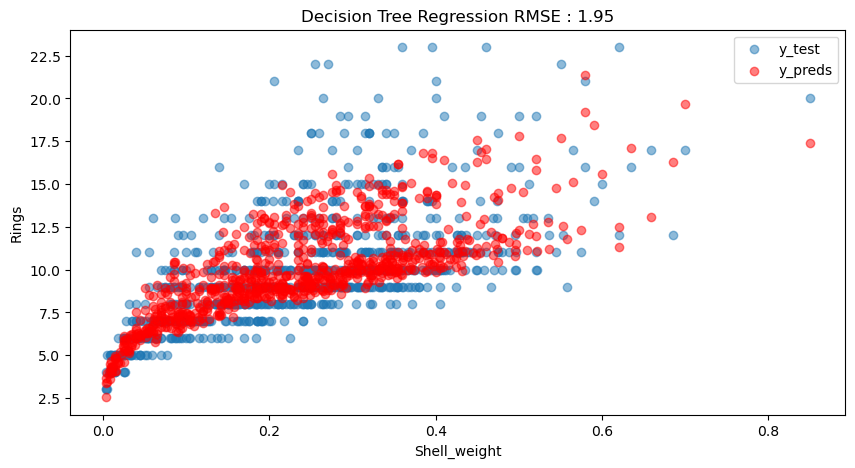

In [49]:
from sklearn.ensemble import RandomForestRegressor  # 랜덤 포레스트 모델

Rf = RandomForestRegressor(random_state=42)
Rf.fit(X_train, y_train)
y_preds = Rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_preds).round(2)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.5)
plt.scatter(X_test['Shell_weight'], y_preds, label='y_preds', alpha=0.5, color='red')
plt.title(f"Decision Tree Regression RMSE : {rmse}")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()

- 서포트 벡터 회귀 (SVR)

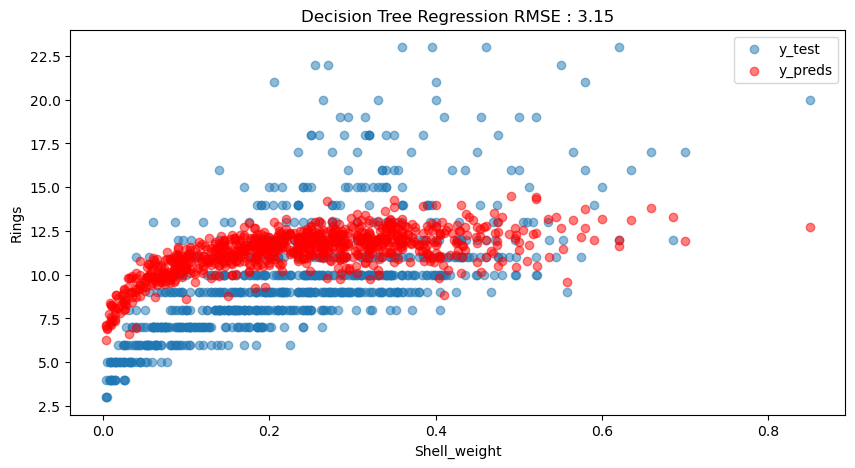

In [50]:

from sklearn.svm import SVR  # 서포트 벡터 

Svr = SVR(kernel='linear')
Svr.fit(X_train, y_train)
y_preds = Svr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_preds).round(2)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.5)
plt.scatter(X_test['Shell_weight'], y_preds, label='y_preds', alpha=0.5, color='red')
plt.title(f"Decision Tree Regression RMSE : {rmse}")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()